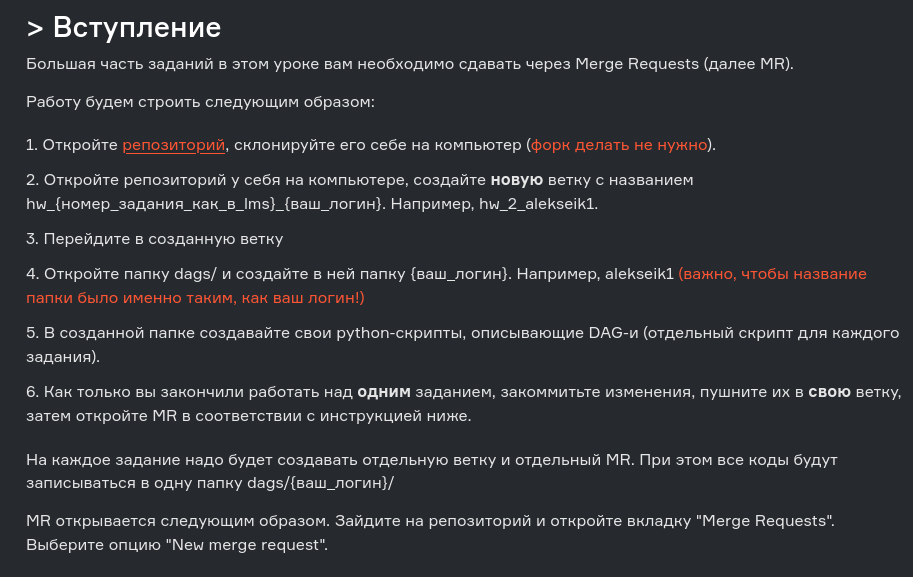

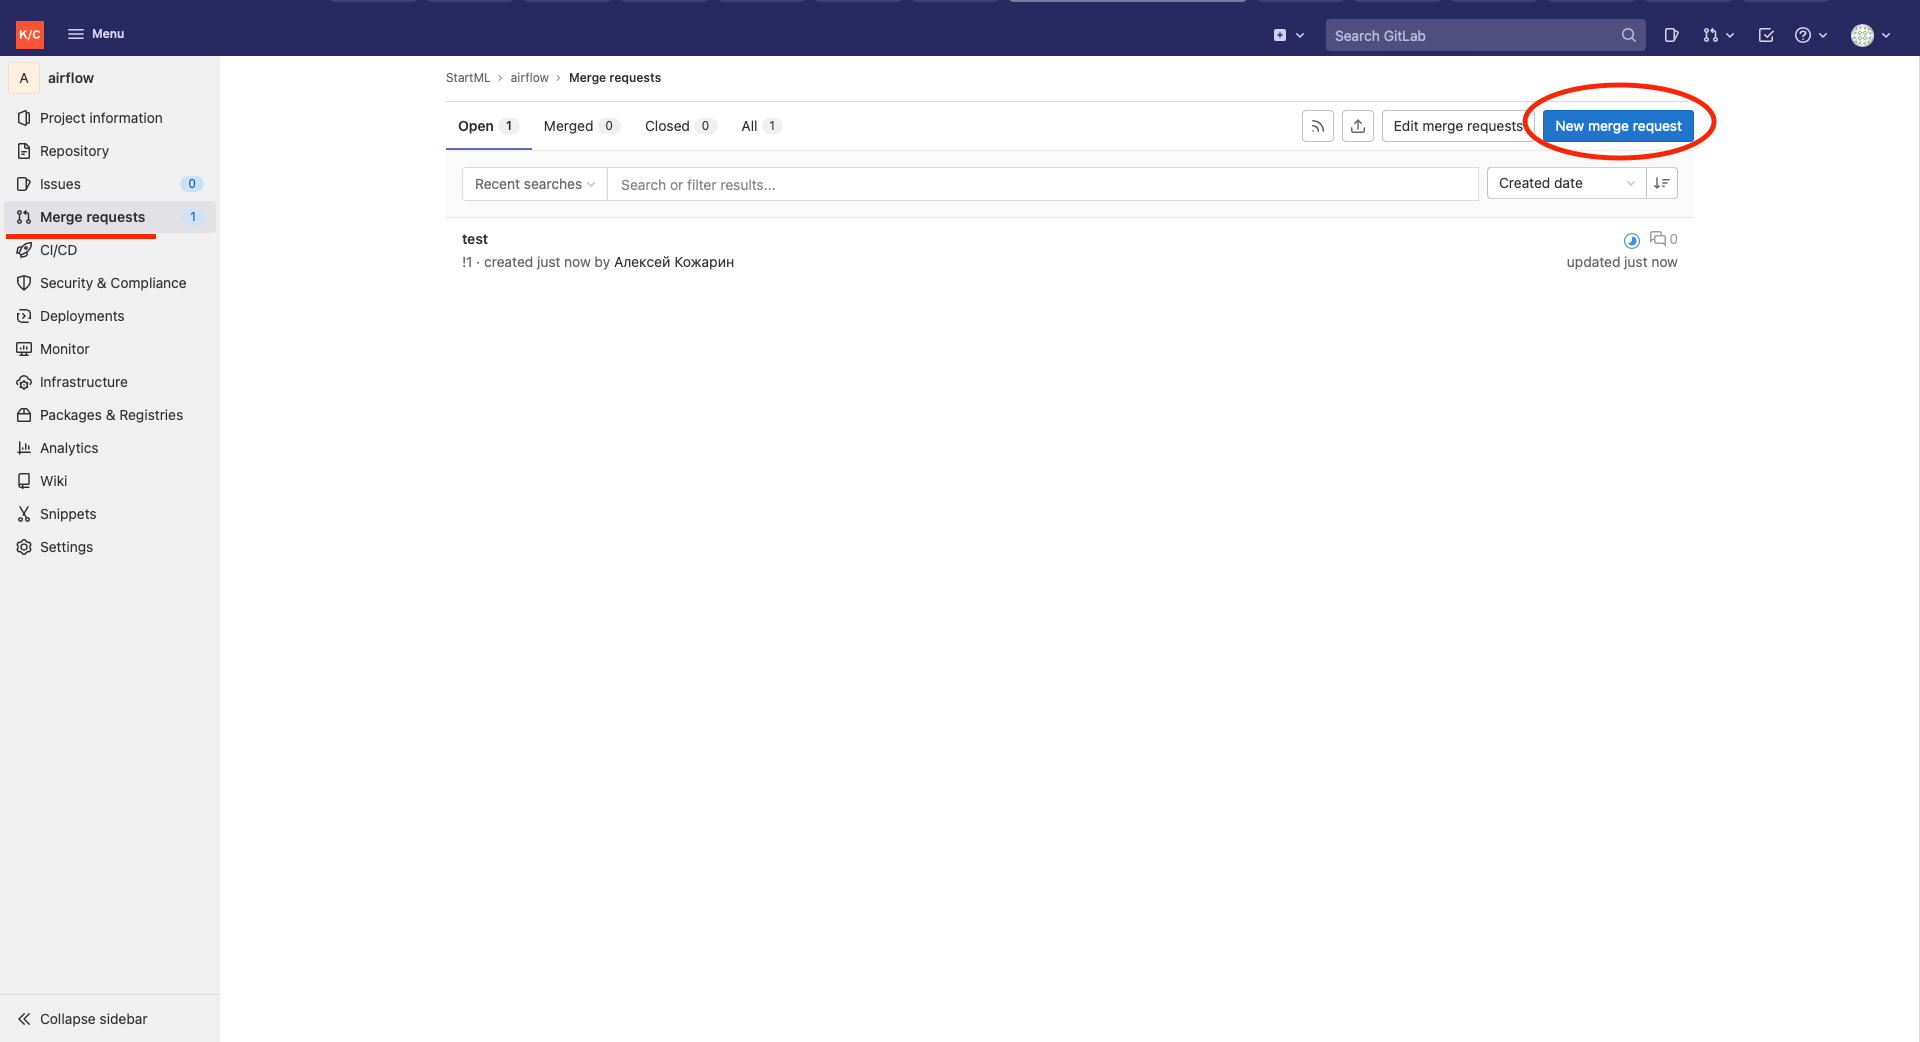

Затем слева выберите свою ветку, а справа выберите master.

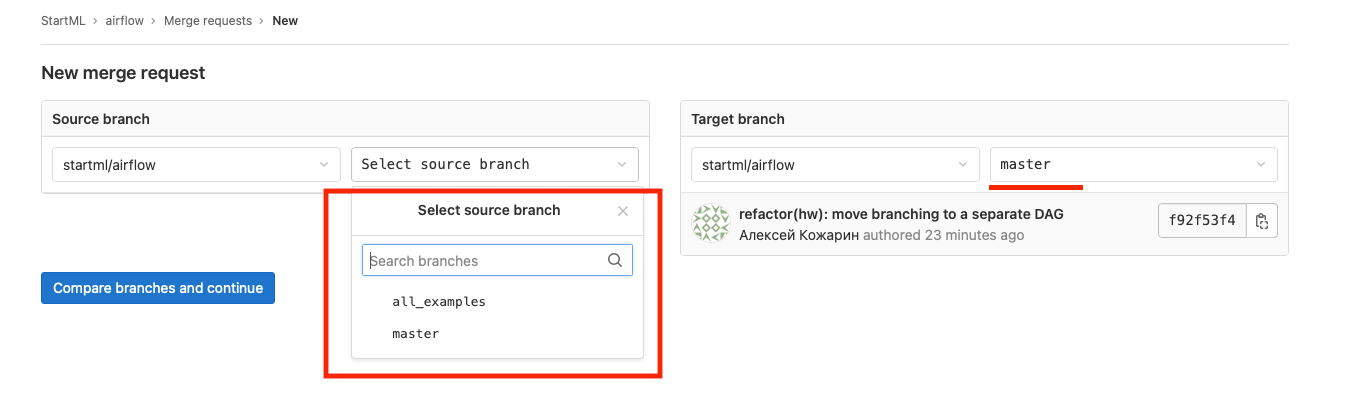

Далее: укажите в названии MR "HW номер ваш_логин", например, "HW 2 alekseik1", потом проверьте еще раз ветки (вы мерджите свою ветку в master) и нажмите "Create merge request".


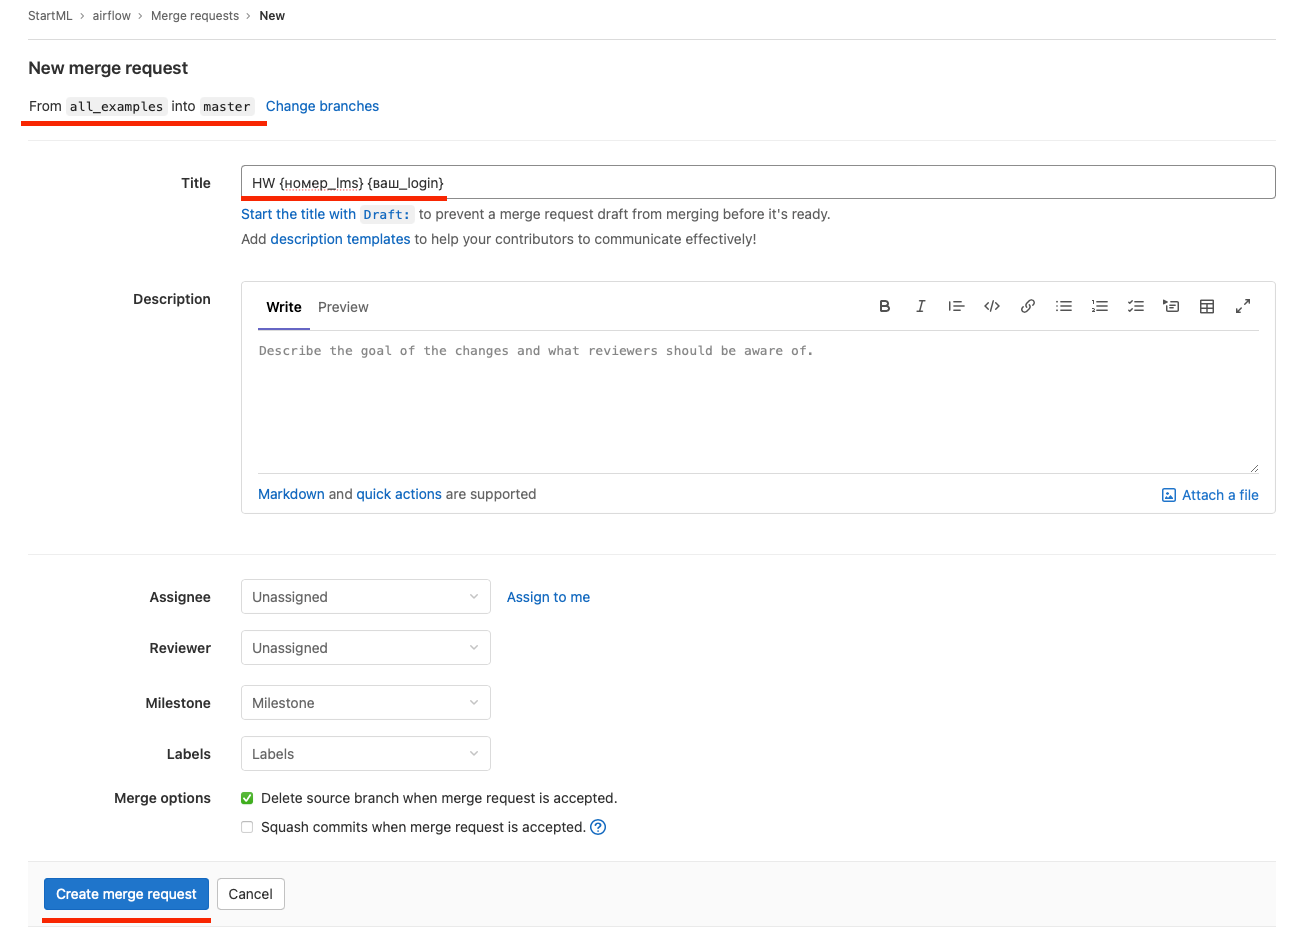


Если вы все сделали правильно, на вашем MR должна появиться зеленая галочка. Нажимаем кнопку "Merge", и можно идти смотреть, появился ли ваш DAG в Airflow.

Также в заданиях вы будете создавать много DAG-ов. В рамках всех заданий в этом уроке используйте следующие параметры по умолчанию:
```python
default_args={
    'depends_on_past': False,
    'email': ['airflow@example.com'],
    'email_on_failure': False,
    'email_on_retry': False,
    'retries': 1,
    'retry_delay': timedelta(minutes=5),  # timedelta из пакета datetime
}

```
Не забывайте, что каждому DAG надо давать уникальный ID. Удачи!

# 2

> Первый DAG

- Напишите DAG, который будет содержать `BashOperator и PythonOperator`.
- В функции PythonOperator примите аргумент ds и распечатайте его. 
- Можете распечатать дополнительно любое другое сообщение.

- В BashOperator выполните команду pwd, которая выведет директорию, где выполняется ваш код Airflow.

- Результат может оказаться неожиданным, не пугайтесь - Airflow может запускать ваши задачи на разных машинах или контейнерах с разными настройками и путями по умолчанию.

- Сделайте так, чтобы сначала выполнялся BashOperator, потом PythonOperator. 

In [ ]:
"""
hw_2.py DAG
"""
from datetime import datetime, timedelta
from airflow import DAG
from airflow.operators.bash import BashOperator
from airflow.operators.python import PythonOperator

with DAG(
        'hw_2_a-bogdanov',  # уникальное имя DAG
        default_args={
            'depends_on_past': False,
            'email': ['airflow@example.com'],
            'email_on_failure': False,
            'email_on_retry': False,
            'retries': 1,
            'retry_delay': timedelta(minutes=5),  # timedelta из пакета datetime
        },

        description='Lesson 11, Task 2',
        schedule_interval=timedelta(days=1),
        start_date=datetime(2022, 1, 1),
        catchup=False,

        tags=['Lesson_11_Task_2'],
) as dag:

    t1 = BashOperator(
        task_id='print_dir',
        bash_command='pwd', # передаем путь pwd в bash
    )


    def print_context(ds, **kwargs):
        print(kwargs)
        print(ds)
        return 'Whatever you return gets printed in the logs'

    t2 = PythonOperator(
        task_id='print_ds',
        python_callable=print_context, # передаем функцию print_context
    )


    t1 >> t2


# 3

> Динамические задачи

В прошлом примере все задачи в DAG были объявлены явно. Однако это не единственный способ задать DAG: можно использовать всю силу цикла for для объявления задач.

 - Создайте новый DAG и объявите в нем 30 задач. 
 
 - Первые 10 задач сделайте типа `BashOperator` и выполните в них произвольную команду, так или иначе использующую переменную цикла `(например, можете указать f"echo {i}").`

- Оставшиеся 20 задач должны быть PythonOperator, при этом функция должна задействовать переменную из цикла. 

- Вы можете добиться этого, если передадите переменную через op_kwargs и примете ее на стороне функции. 

- Функция должна печатать "task number is: {task_number}", где task_number - номер задания из цикла. 



In [ ]:
"""
hw_3.py DAG
"""
from datetime import datetime, timedelta
from airflow import DAG
from airflow.operators.bash import BashOperator
from airflow.operators.python import PythonOperator

with DAG(
        'hw_3_a-bogdanov',  # уникальное имя DAG
        default_args={
            'depends_on_past': False,
            'email': ['airflow@example.com'],
            'email_on_failure': False,
            'email_on_retry': False,
            'retries': 1,
            'retry_delay': timedelta(minutes=5),  # timedelta из пакета datetime
        },

        description='Lesson 11, Task 3',
        schedule_interval=timedelta(days=1),
        start_date=datetime(2022, 1, 1),
        catchup=False,

        tags=['Lesson_11_Task_3'],
) as dag:
    for i in range(10):
        t1 = BashOperator(
            task_id='print_in_bash_' + str(i),
            bash_command=f"echo line number {i}", # передаем путь pwd в bash
        )

    def task_number(ds, task_number, **kwargs):
        print(kwargs)
        print(ds)
        return f"task number is: {task_number}"

    for i in range(20):
        t2 = PythonOperator(
            task_id='print_task_num_' + str(i),
            python_callable=task_number, # передаем функцию task_number
            op_kwargs={'task_number': i} # передаем значение i в функцию task_number свв виде словаря
        )


    t1 >> t2


# 4
> Документация

Добавьте к вашим задачам из прошлого задания `документацию`. 

- В документации обязательно должны быть элементы кода ```(заключены в кавычки `code`)```, 
- `полужирный текст и текст курсивом, а также абзац (объявляется через решетку).



In [ ]:
"""
hw_4.py DAG
"""
from datetime import datetime, timedelta
from airflow import DAG
from airflow.operators.bash import BashOperator
from airflow.operators.python import PythonOperator
from textwrap import dedent

with DAG(
        'hw_4_a-bogdanov',  # уникальное имя DAG
        default_args={
            'depends_on_past': False,
            'email': ['airflow@example.com'],
            'email_on_failure': False,
            'email_on_retry': False,
            'retries': 1,
            'retry_delay': timedelta(minutes=5),  # timedelta из пакета datetime
        },

        description='Lesson 11, Task 4',
        schedule_interval=timedelta(days=1),
        start_date=datetime(2022, 1, 1),
        catchup=False,

        tags=['Lesson_11_Task_4'],
) as dag:
    for i in range(10):
        t1 = BashOperator(
            task_id='print_in_bash_' + str(i),
            bash_command=f"echo line number {i}", # передаем путь pwd в bash
        )

    def task_number(ds, task_number, **kwargs):
        print(kwargs)
        print(ds)
        return f"task number is: {task_number}"

    for i in range(20):
        t2 = PythonOperator(
            task_id='print_task_num_' + str(i),
            python_callable=task_number, # передаем функцию task_number
            op_kwargs={'task_number': i} # передаем значение i в функцию task_number свв виде словаря
        )
    t2.doc_md = dedent(
        """\
        # Task documentations
        This **task 4** prints a line 
        with the task *number*,
        example `op_kwargs={'task_number': i}  \ return f"task number is: {task_number}"`
        ![image.png](attachment:image.png)
        """
    )

    t1 >> t2

# 5

> Шаблонизация

- Создайте новый DAG, состоящий из одного BashOperator. 
- Этот оператор должен  использовать `шаблонизированную` команду следующего вида:
    - Для каждого i в диапазоне от 0 до 5 не включительно распечатать значение `ts` и затем распечатать значение `run_id`. 
    - Здесь `ts` и `run_id` - это шаблонные переменные (вспомните, как в лекции подставляли шаблонные переменные).

In [ ]:
"""
hw_5.py DAG
"""
from datetime import datetime, timedelta
from airflow import DAG
from airflow.operators.bash import BashOperator
from airflow.operators.python import PythonOperator
from textwrap import dedent

with DAG(
        'hw_5_a-bogdanov',  # уникальное имя DAG
        default_args={
            'depends_on_past': False,
            'email': ['airflow@example.com'],
            'email_on_failure': False,
            'email_on_retry': False,
            'retries': 1,
            'retry_delay': timedelta(minutes=5),  # timedelta из пакета datetime
        },

        description='Lesson 11, Task 5',
        schedule_interval=timedelta(days=1),
        start_date=datetime(2022, 1, 1),
        catchup=False,

        tags=['Lesson_11_Task_5_print_in_template'],
) as dag:

    temp_command = dedent(
        """
        {% for i in range(5) %}
            echo "{{ ts }}"
        {% endfor %}
        echo "{{run_id}}"
        """
    )

    t1 = BashOperator(
        task_id='print_in_template',
        bash_command=temp_command, # передаем temp_command
    )


    t1


# 6

> Env в BashOperator

- Возьмите `BashOperator` из второго задания (где создавали task через цикл) и подбросьте туда переменную окружения `NUMBER`, 
    - чье значение будет равно i из цикла. 
- Распечатайте это значение в команде, указанной в операторе 
    - для этого используйте `bash_command="echo $NUMBER" `

In [ ]:
"""
hw_6.py DAG
"""
from datetime import datetime, timedelta
from airflow import DAG
from airflow.operators.bash import BashOperator
from airflow.operators.python import PythonOperator

with DAG(
        'hw_6_a-bogdanov',  # уникальное имя DAG
        default_args={
            'depends_on_past': False,
            'email': ['airflow@example.com'],
            'email_on_failure': False,
            'email_on_retry': False,
            'retries': 1,
            'retry_delay': timedelta(minutes=5),  # timedelta из пакета datetime
        },

        description='Lesson 11, Task 6',
        schedule_interval=timedelta(days=1),
        start_date=datetime(2022, 1, 1),
        catchup=False,

        tags=['Lesson_11_Task_6'],
) as dag:
    for i in range(10):
        t1 = BashOperator(
            task_id='print_in_bash_env_' + str(i),
            env = {'NUMBER': str(i)}, # создаем переменную окружения, передаем значение str(i) из цикла
            bash_command=f"echo $NUMBER", # передаем значение $NUMBER через $
        )


    t1


# 7 

> Больше аргументов

- Добавьте в PythonOperator из второго задания (где создавали 30 операторов в цикле) kwargs 
    - и передайте в этот kwargs task_number со значением переменной цикла. 
- Также добавьте прием аргумента ts и run_id в функции, указанной в PythonOperator, 
    - и распечатайте эти значения.

In [ ]:
"""
hw_7.py DAG
"""
from datetime import datetime, timedelta
from textwrap import dedent

from airflow import DAG
from airflow.operators.bash import BashOperator
from airflow.operators.python import PythonOperator

with DAG(
        'hw_7_a-bogdanov',  # уникальное имя DAG
        default_args={
            'depends_on_past': False,
            'email': ['airflow@example.com'],
            'email_on_failure': False,
            'email_on_retry': False,
            'retries': 1,
            'retry_delay': timedelta(minutes=5),  # timedelta из пакета datetime
        },

        description='Lesson 11, Task 7',
        schedule_interval=timedelta(days=1),
        start_date=datetime(2022, 1, 1),
        catchup=False,

        tags=['Lesson_11_Task_7'],
) as dag:
    def print_context(ts, run_id, task_number):
        print(ts, run_id)
        return f"task number is: {task_number}"


    for i in range(20):
        t1 = PythonOperator(
            task_id='print_task_num_' + str(i),
            python_callable=print_context,  # передаем функцию print_context
            op_kwargs={'task_number': i}  # передаем значение i в функцию print_context в виде словаря
        )

    t1

# 8

> Про даты

Посмотрите на логи запуска таски из прошлого задания (где печатали `ts и run_id`). Что можно сказать про эти переменные?

- `ts` включает дату и время выполнения

- `ts` указывает на "логическую" дату/время (т.е. на то, за которое задача должна была быть запущена)

- `run_id` - это идентификатор запуска задачи, состоящий из параметра и времени запуска

# 9

> XCom: явный

- Сделайте новый DAG, содержащий `два Python оператора`. 
- Первый PythonOperator должен класть в `XCom` значение "xcom test" по ключу "sample_xcom_key".

- `Второй PythonOperator` должен доставать это значение и печатать его. 
- Настройте правильно последовательность операторов.

- Посмотрите внимательно, какие аргументы мы принимали в функции, когда работали с XCom.

In [ ]:
"""
hw_9.py DAG
"""
from datetime import timedelta, datetime
from airflow import DAG
from airflow.operators.python import PythonOperator

# x_com отправляем данные явно
def get_testing_increase(ti):
    ti.xcom_push(
        key='sample_xcom_key',
        value='xcom test'
    )
# xcom_pull принимаем данные
def get_testing_data(ti):
    data_read_push = ti.xcom_pull(
        key='sample_xcom_key',
        task_ids='push_data_out',
    )
    print('Test xcom: ', data_read_push)



with DAG(
        'hw_9_a-bogdanov',  # уникальное имя DAG
        default_args={
            'depends_on_past': False,
            'email': ['airflow@example.com'],
            'email_on_failure': False,
            'email_on_retry': False,
            'retries': 1,
            'retry_delay': timedelta(minutes=5),  # timedelta из пакета datetime
        },

        description='Lesson 11, Task 9',
        schedule_interval=timedelta(days=1),
        start_date=datetime(2022, 1, 1),
        catchup=False,

        tags=['Lesson_11_Task_9'],
) as dag:

    t1 = PythonOperator(
        task_id='push_data_out',
        python_callable=get_testing_increase
    )

    t2 = PythonOperator(
        task_id='pull_data_in',
        python_callable=get_testing_data
    )

    t1 >> t2

# 10

> XCom: неявный

В лекции говорилось, что любой вывод `return уходит неявно в XCom`. Давайте это проверим.

- Создайте новый DAG, содержащий два PythonOperator. 
- Первый оператор должен вызвать функцию, возвращающую строку "Airflow tracks everything".

- Второй оператор должен получить эту строку через XCom. Вспомните по лекции, какой должен быть ключ. 
- Настройте правильно последовательность операторов.



In [ ]:
"""
hw_10.py DAG
"""
from datetime import timedelta, datetime
from airflow import DAG
from airflow.operators.python import PythonOperator


# x_com отправляем данные неявно
def x_com_push(ti):
    ti.xcom_push(
        key='to_return_xcom_key',
    )
    return "Airflow tracks everything"


# xcom_pull принимаем данные
def x_com_pull(ti):
    data_read_push = ti.xcom_pull(
        key='return_value',
        task_ids='push_data_out',
    )
    print('Test xcom: ', data_read_push)


with DAG(
        'hw_10_a-bogdanov',  # уникальное имя DAG
        default_args={
            'depends_on_past': False,
            'email': ['airflow@example.com'],
            'email_on_failure': False,
            'email_on_retry': False,
            'retries': 1,
            'retry_delay': timedelta(minutes=5),  # timedelta из пакета datetime
        },

        description='Lesson 11, Task 10',
        schedule_interval=timedelta(days=1),
        start_date=datetime(2022, 1, 1),
        catchup=False,

        tags=['Lesson_11_Task_10'],
) as dag:
    # отправляем значения
    t1 = PythonOperator(
        task_id='push_data_out',
        python_callable=x_com_push
    )

    # принимаем значения
    t2 = PythonOperator(
        task_id='pull_data_in',
        python_callable=x_com_pull
    )

    t1 >> t2


# 11

> Connections

- Напишите DAG, состоящий из одного PythonOperator. 

- Этот оператор должен, используя подключение с `conn_id="startml_feed"`, 
- найти пользователя, который поставил больше всего лайков, и вернуть словарь `{'user_id': <идентификатор>, 'count': <количество лайков>}.`
    - Эти значения, кстати, сохранятся в XCom.

**Для подключения к postgres вы можете использовать два подхода. Первый - делать как на лекции:**
```python
from airflow.hooks.base import BaseHook
import psycopg2

creds = BaseHook.get_connection(id соединения)
with psycopg2.connect(
  f"postgresql://{creds.login}:{creds.password}"
  f"@{creds.host}:{creds.port}/{creds.schema}"
) as conn:
  with conn.cursor() as cursor:
    ...
    # your code
```
**А есть и более удобный вариант - напрямую использовать PostgresHook, который сразу умеет создавать нужные сессии для Postgres:**
```python
from airflow.providers.postgres.operators.postgres import PostgresHook

postgres = PostgresHook(postgres_conn_id=...)
with postgres.get_conn() as conn:   # вернет тот же connection, что вернул бы psycopg2.connect(...)
  with conn.cursor() as cursor:
    # your code
    ...
```
Для решения задания можете использовать любой из этих вариантов.

In [ ]:
"""
hw_11.py DAG
"""
from datetime import timedelta, datetime
from airflow import DAG
from airflow.operators.python import PythonOperator

from airflow.providers.postgres.operators.postgres import PostgresHook


def get_db():
    postgres = PostgresHook(postgres_conn_id="startml_feed")
    with postgres.get_conn() as conn:  # вернет тот же connection, что вернул бы psycopg2.connect(...)
        with conn.cursor() as cursor:
            cursor.execute(
                f"""
                    SELECT
                        user_id, 
                        COUNT(action)
                    FROM feed_action
                    WHERE action = 'like'
                    GROUP BY user_id
                    ORDER BY COUNT(action) DESC
                    LIMIT 1
                 """
            )
            return cursor.fetchall()


with DAG(
        'hw_11_a-bogdanov',  # уникальное имя DAG
        default_args={
            'depends_on_past': False,
            'email': ['airflow@example.com'],
            'email_on_failure': False,
            'email_on_retry': False,
            'retries': 1,
            'retry_delay': timedelta(minutes=5),  # timedelta из пакета datetime
        },

        description='Lesson 11, Task 11',
        schedule_interval=timedelta(days=1),
        start_date=datetime(2022, 1, 1),
        catchup=False,

        tags=['Lesson_11_Task_11'],
) as dag:
    # отправляем значения
    t1 = PythonOperator(
        task_id='get_db_req',
        python_callable=get_db
    )

    t1

# 12

> Variables: основы

- Напишите DAG, состоящий из одного PythonOperator. 
- Этот оператор должен печатать значение `Variable` с названием `is_startml`.

In [ ]:
"""
hw_12.py DAG
"""
from datetime import datetime, timedelta
from airflow import DAG
from airflow.operators.python import PythonOperator



with DAG(
        'hw_12_a-bogdanov',  # уникальное имя DAG
        default_args={
            'depends_on_past': False,
            'email': ['airflow@example.com'],
            'email_on_failure': False,
            'email_on_retry': False,
            'retries': 1,
            'retry_delay': timedelta(minutes=5),  # timedelta из пакета datetime
        },

        description='Lesson 11, Task 12',
        schedule_interval=timedelta(days=1),
        start_date=datetime(2022, 1, 1),
        catchup=False,

        tags=['Lesson_11_Task_12'],
) as dag:
    def print_variables(var):
        from airflow.models import Variable
        is_startml = Variable.get("is_startml")
        print(is_startml)
        return 'is_startml variable print'

    t1 = PythonOperator(
        task_id='print_variable',
        python_callable=print_variables,  # передаем функцию print_variables
     )

    t1

# 13

> Variables и Branching: сложные переходы

`BranchingOperator` - это оператор, который по некоторому условию определяет, в какое ответвление пойдет выполнение DAG. 

Один из способов определить это "некоторое условие" - это задать python функцию, которая будет возвращать `task_id`, куда надо перейти после ветвления.

- Создайте DAG, имеющий BranchPythonOperator. 
- Логика ветвления должна быть следующая: если значение Variable is_startml равно "True", то перейти в таску с task_id="startml_desc",
    - иначе перейти в таску с task_id="not_startml_desc". 

- Затем объявите две задачи с task_id="startml_desc" и `task_id="not_startml_desc"`.
    - NB: класс Variable возвращает строку!

- В первой таске распечатайте `"StartML is a starter course for ambitious people", `
- во второй `"Not a startML course, sorry".`

- Перед BranchPythonOperator можете поставить DummyOperator - он ничего не делает, но зато задает красивую "стартовую точку" на графе. 
- Точно так же можете поставить DummyOperator в конце DAG.

- По итогу у вас получится следующий граф (с DummyOperator):

In [ ]:
"""
hw_13.py DAG
"""
from datetime import datetime, timedelta
from airflow import DAG
from airflow.operators.python import PythonOperator, BranchPythonOperator
from airflow.models import Variable


with DAG(
        'hw_13_a-bogdanov',  # уникальное имя DAG
        default_args={
            'depends_on_past': False,
            'email': ['airflow@example.com'],
            'email_on_failure': False,
            'email_on_retry': False,
            'retries': 1,
            'retry_delay': timedelta(minutes=5),  # timedelta из пакета datetime
        },

        description='Lesson 11, Task 13',
        schedule_interval=timedelta(days=1),
        start_date=datetime(2022, 1, 1),
        catchup=False,
        tags=['Lesson_11_Task_13'],
) as dag:

    # функция для BranchPythonOperator, в зависимости от ответа сработает определенная ветка
    def decide_which_path():
        if Variable.get("is_startml") == 'True':
           return "startml_desc"
        return "not_startml_desc"

    def print_true():
       print("StartML is a starter course for ambitious people")
       return 'Print text from task_id - startml_desc'

    def print_other():
       print("Not a startML course, sorry")
       return 'Print text from task_id - not_startml_desc'

    # BranchPythonOperator это оператор, который по
    # некоторому условию определяет, в какое ответвление пойдет выполнение DAG
    t1 = BranchPythonOperator(
        task_id='run_this_first',
        python_callable=decide_which_path,
        trigger_rule="one_success"
    )

    t2 = PythonOperator(
        task_id='startml_desc',
        python_callable=print_true
    )


    t3 = PythonOperator(
        task_id='not_startml_desc',
        python_callable=print_other
    )

    t1 >> [t2, t3]
